<a href="https://colab.research.google.com/github/ad17171717/YouTube-Tutorials/blob/main/Python/Steganography/Steganography_with_Python!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

# **Steganography**

**Steganography is the science of hiding information by embedding
a hidden message within an object. Steganography relies on deception; the object may be easily viewable, however the hidden message within may not be obvious.**

**The object can be physical, such as a message with lemon juice on paper that is revealed when heat is applied to the paper. The object can also be electronic; in our example we will conceal a message within a Portable Network Graphics (PNG) image using the Python programming language.**

**Steganography and Cryptography are similar, yet different disciplines. Both attempt to conceal information. The difference is cryptography is stored to keep outside users away from the information. Steganography hides the message in plain sight; the hidden message does not attract attention to itself as an object of scrutiny**

<sup>[Steganography](https://www.jsums.edu/nmeghanathan/files/2015/05/CSC439-Sp2013-10-Steganography.pdf) by Dr. Natarajan Meghanathan from Jackson State University's website</sup>

<sup>[Steganography](https://en.wikipedia.org/wiki/Steganography) from Wikipedia.org</sup>

## **Hiding a message within an Image**

**This tutorial will review how to embed a hidden message within an image. The image type that is used to embed the image is a key consideration. Two popular image types are Joint Photographic Experts Group (JPEG or JPG) and Portable Network Graphics (PNG) files. Because JPGs use a lossy compression the file type cannot be used for Steganography because the compression deletes data. This can cause the hidden message to be deleted inadvertently. We will use a PNG image to embed the message into the image because the PNG file type uses lossless compression when it is written. This means that our data will be intact after we write our message into the image.**

<sup>[JPEG vs PNG](https://www.adobe.com/creativecloud/file-types/image/comparison/jpeg-vs-png.html) from Adobe.com</sup>

In [ ]:
#read the image into a numpy array
pixel_array = plt.imread('dog_picture.png')
print(f'The height of the image is {pixel_array.shape[0]} pixels and the width of the image is {pixel_array.shape[1]} pixels.\nThe number of color channels is {pixel_array.shape[2]}.')

The height of the image is 1131 pixels and the width of the image is 1600 pixels.
The number of color channels is 4.


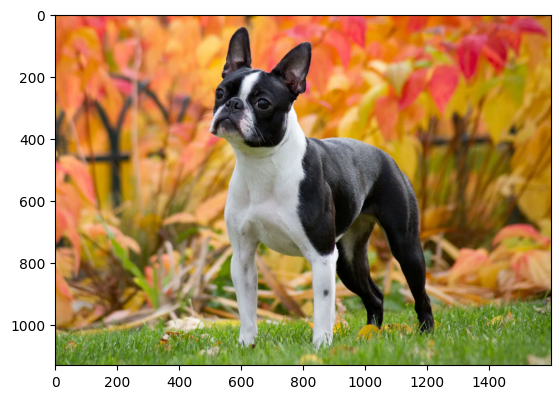

In [ ]:
#display image
plt.imshow(pixel_array);

## **Function to Write Data into the Image**

In [ ]:
def steg_write(image_path, message, output_path='edited_image.png', spacing=10):

    #check the image is a png
    if not image_path.lower().endswith('.png'):
        raise ValueError('The input image must be a PNG file')

    #open the image using PIL
    img = Image.open(image_path)
    pixel_array = np.array(img)

    #convert message to ascii values
    message_values = [ord(char) for char in message]

    image_shape = pixel_array.shape

    pixel_list = pixel_array.flatten().tolist()
    if len(message)*spacing > len(pixel_list):
        raise ValueError('The message length and spacing is larger than the number of pixels in the image')

    #save indices where the message will be hidden
    idx_list = [idx * spacing for idx in range(len(message_values))]

    #replace pixel values with message values
    for idx, char in zip(idx_list, message_values):
        pixel_list[idx] = char

    #reshape list back to image shape
    edited_array = np.array(pixel_list).reshape(image_shape).astype(np.uint8)

    #save the edited image in a lossless format, png
    edited_img = Image.fromarray(edited_array)
    edited_img.save(output_path)

    #message length is needed as an input to decipher message
    print(f'Message Length: {len(message):,}')
    print('Image Saved!')

In [ ]:
steg_write('dog_picture.png',output_path='edited_image.png',message='hello')

Message Length: 5
Image Saved!


## **Display Edited Image**

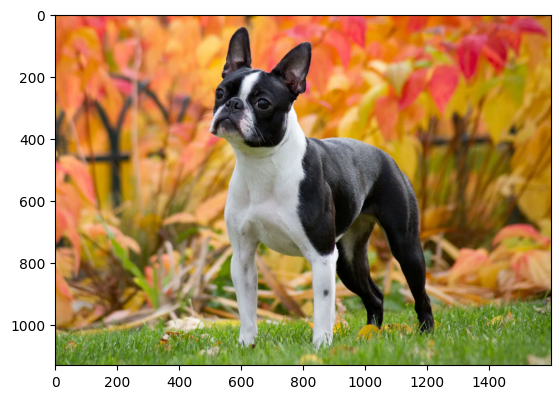

In [ ]:
plt.imshow(mpimg.imread('edited_image.png'));

## **Function to Read Data in the Image**

In [ ]:
def steg_read(image_path, message_length, spacing=10):
    #open the image using PIL
    img = Image.open(image_path)
    pixel_array = np.array(img)

    pixel_list = pixel_array.flatten().tolist()

    #retrieve indices where the message will be hidden
    idx_list = [idx * spacing for idx in range(message_length)]

    #extract hidden message values
    hidden_values = [pixel_list[idx] for idx in idx_list]

    #convert ascii values to unicode
    chars = [chr(value) for value in hidden_values]

    return ''.join(chars)

In [ ]:
steg_read(image_path='edited_image.png',message_length=5)

'hello'

## **Limitations of `steg_write` Function**

**The `steg_write` function within this notebook is a simple algorithm to hide a given message within the image. There are limitations, if the length of the message is significantly long enough, the pixels in the image can change enough for someone to notice the difference. Changing the `spacing` parameter may hide the message better, but a more sophisticated algorithm that would match the hidden message values to similar pixel values is a better solution.**

**If the message is too long then the number of pixels replaced in the image will render it completely different fr. There can also be a situation where the contents of a file being written to an image are larger than the image itself, rendering Steganography impractical.**

### **Visual Clue**

**The text below is a short story [The Pit and the Pendulum](https://poestories.com/read/pit) by Edgar Allen Poe. We will see if we use the default `spacing` value there is a visual clue that there is information embedded in the image. The `spacing` can be modified to better hide the information visually.**

In [ ]:
long_text1 = '''I WAS sick -- sick unto death with that long algony; and when they at length unbound me, and I was permitted to sit, I felt that my senses were leaving me. The sentence -- the dread sentence of death -- was the last of distinct accentuation which reached my ears. After that, the sound of the inquisitorial voices seemed merged in one dreamy indeterminate hum. It conveyed to my soul the idea of revolution -- perhaps from its association in fancy with the burr of a mill wheel. This only for a brief period; for presently I heard no more. Yet, for a while, I saw; but with how terrible an exaggeration! I saw the lips of the black-robed judges. They appeared to me white -- whiter than the sheet upon which I trace these words -- and thin even to grotesqueness; thin with the intensity of their expression of firmness -- of immoveable resolution -- of stern contempt of human torture. I saw that the decrees of what to me was Fate, were still issuing from those lips. I saw them writhe with a deadly locution. I saw them fashion the syllables of my name; and I shuddered because no sound succeeded. I saw, too, for a few moments of delirious horror, the soft and nearly imperceptible waving of the sable draperies which enwrapped the walls of the apartment. And then my vision fell upon the seven tall candles upon the table. At first they wore the aspect of charity, and seemed white and slender angels who would save me; but then, all at once, there came a most deadly nausea over my spirit, and I felt every fibre in my frame thrill as if I had touched the wire of a galvanic battery, while the angel forms became meaningless spectres, with heads of flame, and I saw that from them there would be no help. And then there stole into my fancy, like a rich musical note, the thought of what sweet rest there must be in the grave. The thought came gently and stealthily, and it seemed long before it attained full appreciation; but just as my spirit came at length properly to feel and entertain it, the figures of the judges vanished, as if magically, from before me; the tall candles sank into nothingness; their flames went out utterly; the blackness of darkness supervened; all sensations appeared swallowed up in a mad rushing descent as of the soul into Hades. Then silence, and stillness, night were the universe. I had swooned; but still will not say that all of consciousness was lost. What of it there remained I will not attempt to define, or even to describe; yet all was not lost. In the deepest slumber -- no! In delirium -- no! In a swoon -- no! In death -- no! even in the grave all is not lost. Else there is no immortality for man. Arousing from the most profound of slumbers, we break the gossamer web of some dream. Yet in a second afterward, (so frail may that web have been) we remember not that we have dreamed. In the return to life from the swoon there are two stages; first, that of the sense of mental or spiritual; secondly, that of the sense of physical, existence. It seems probable that if, upon reaching the second stage, we could recall the impressions of the first, we should find these impressions eloquent in memories of the gulf beyond. And that gulf is -- what? How at least shall we distinguish its shadows from those of the tomb? But if the impressions of what I have termed the first stage, are not, at will, recalled, yet, after long interval, do they not come unbidden, while we marvel whence they come? He who has never swooned, is not he who finds strange palaces and wildly familiar faces in coals that glow; is not he who beholds floating in mid-air the sad visions that the many may not view; is not he who ponders over the perfume of some novel flower -- is not he whose brain grows bewildered with the meaning of some musical cadence which has never before arrested his attention. Amid frequent and thoughtful endeavors to remember; amid earnest struggles to regather some token of the state of seeming nothingness into which my soul had lapsed, there have been moments when I have dreamed of success; there have been brief, very brief periods when I have conjured up remembrances which the lucid reason of a later epoch assures me could have had reference only to that condition of seeming unconsciousness. These shadows of memory tell, indistinctly, of tall figures that lifted and bore me in silence down -- down -- still down -- till a hideous dizziness oppressed me at the mere idea of the interminableness of the descent. They tell also of a vague horror at my heart, on account of that heart\'s unnatural stillness. Then comes a sense of sudden motionlessness throughout all things; as if those who bore me (a ghastly train!) had outrun, in their descent, the limits of the limitless, and paused from the wearisomeness of their toil. After this I call to mind flatness and dampness; and then all is madness -- the madness of a memory which busies itself among forbidden things. Very suddenly there came back to my soul motion and sound -- the tumultuous motion of the heart, and, in my ears, the sound of its beating. Then a pause in which all is blank. Then again sound, and motion, and touch -- a tingling sensation pervading my frame. Then the mere consciousness of existence, without thought -- a condition which lasted long. Then, very suddenly, thought, and shuddering terror, and earnest endeavor to comprehend my true state. Then a strong desire to lapse into insensibility. Then a rushing revival of soul and a successful effort to move. And now a full memory of the trial, of the judges, of the sable draperies, of the sentence, of the sickness, of the swoon. Then entire forgetfulness of all that followed; of all that a later day and much earnestness of endeavor have enabled me vaguely to recall. So far, I had not opened my eyes. I felt that I lay upon my back, unbound. I reached out my hand, and it fell heavily upon something damp and hard. There I suffered it to remain for many minutes, while I strove to imagine where and what I could be. I longed, yet dared not to employ my vision. I dreaded the first glance at objects around me. It was not that I feared to look upon things horrible, but that I grew aghast lest there should be nothing to see. At length, with a wild desperation at heart, I quickly unclosed my eyes. My worst thoughts, then, were confirmed. The blackness of eternal night encompassed me. I struggled for breath. The intensity of the darkness seemed to oppress and stifle me. The atmosphere was intolerably close. I still lay quietly, and made effort to exercise my reason. I brought to mind the inquisitorial proceedings, and attempted from that point to deduce my real condition. The sentence had passed; and it appeared to me that a very long interval of time had since elapsed. Yet not for a moment did I suppose myself actually dead. Such a supposition, notwithstanding what we read in fiction, is altogether inconsistent with real existence; -- but where and in what state was I? The condemned to death, I knew, perished usually at the autos-da-fe, and one of these had been held on the very night of the day of my trial. Had I been remanded to my dungeon, to await the next sacrifice, which would not take place for many months? This I at once saw could not be. Victims had been in immediate demand. Moreover, my dungeon, as well as all the condemned cells at Toledo, had stone floors, and light was not altogether excluded. A fearful idea now suddenly drove the blood in torrents upon my heart, and for a brief period, I once more relapsed into insensibility. Upon recovering, I at once started to my feet, trembling convulsively in every fibre. I thrust my arms wildly above and around me in all directions. I felt nothing; yet dreaded to move a step, lest I should be impeded by the walls of a tomb. Perspiration burst from every pore, and stood in cold big beads upon my forehead. The agony of suspense grew at length intolerable, and I cautiously moved forward, with my arms extended, and my eyes straining from their sockets, in the hope of catching some faint ray of light. I proceeded for many paces; but still all was blackness and vacancy. I breathed more freely. It seemed evident that mine was not, at least, the most hideous of fates. And now, as I still continued to step cautiously onward, there came thronging upon my recollection a thousand vague rumors of the horrors of Toledo. Of the dungeons there had been strange things narrated -- fables I had always deemed them -- but yet strange, and too ghastly to repeat, save in a whisper. Was I left to perish of starvation in this subterranean world of darkness; or what fate, perhaps even more fearful, awaited me? That the result would be death, and a death of more than customary bitterness, I knew too well the character of my judges to doubt. The mode and the hour were all that occupied or distracted me. My outstretched hands at length encountered some solid obstruction. It was a wall, seemingly of stone masonry -- very smooth, slimy, and cold. I followed it up; stepping with all the careful distrust with which certain antique narratives had inspired me. This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. I therefore sought the knife which had been in my pocket, when led into the inquisitorial chamber; but it was gone; my clothes had been exchanged for a wrapper of coarse serge. I had thought of forcing the blade in some minute crevice of the masonry, so as to identify my point of departure. The difficulty, nevertheless, was but trivial; although, in the disorder of my fancy, it seemed at first insuperable. I tore a part of the hem from the robe and placed the fragment at full length, and at right angles to the wall. In groping my way around the prison, I could not fail to encounter this rag upon completing the circuit. So, at least I thought: but I had not counted upon the extent of the dungeon, or upon my own weakness. The ground was moist and slippery. I staggered onward for some time, when I stumbled and fell. My excessive fatigue induced me to remain prostrate; and sleep soon overtook me as I lay. Upon awaking, and stretching forth an arm, I found beside me a loaf and a pitcher with water. I was too much exhausted to reflect upon this circumstance, but ate and drank with avidity. Shortly afterward, I resumed my tour around the prison, and with much toil came at last upon the fragment of the serge. Up to the period when I fell I had counted fifty-two paces, and upon resuming my walk, I had counted forty-eight more; -- when I arrived at the rag. There were in all, then, a hundred paces; and, admitting two paces to the yard, I presumed the dungeon to be fifty yards in circuit. I had met, however, with many angles in the wall, and thus I could form no guess at the shape of the vault; for vault I could not help supposing it to be. I had little object -- certainly no hope these researches; but a vague curiosity prompted me to continue them. Quitting the wall, I resolved to cross the area of the enclosure. At first I proceeded with extreme caution, for the floor, although seemingly of solid material, was treacherous with slime. At length, however, I took courage, and did not hesitate to step firmly; endeavoring to cross in as direct a line as possible. I had advanced some ten or twelve paces in this manner, when the remnant of the torn hem of my robe became entangled between my legs. I stepped on it, and fell violently on my face. In the confusion attending my fall, I did not immediately apprehend a somewhat startling circumstance, which yet, in a few seconds afterward, and while I still lay prostrate, arrested my attention. It was this -- my chin rested upon the floor of the prison, but my lips and the upper portion of my head, although seemingly at a less elevation than the chin, touched nothing. At the same time my forehead seemed bathed in a clammy vapor, and the peculiar smell of decayed fungus arose to my nostrils. I put forward my arm, and shuddered to find that I had fallen at the very brink of a circular pit, whose extent, of course, I had no means of ascertaining at the moment. Groping about the masonry just below the margin, I succeeded in dislodging a small fragment, and let it fall into the abyss. For many seconds I hearkened to its reverberations as it dashed against the sides of the chasm in its descent; at length there was a sullen plunge into water, succeeded by loud echoes. At the same moment there came a sound resembling the quick opening, and as rapid closing of a door overhead, while a faint gleam of light flashed suddenly through the gloom, and as suddenly faded away. I saw clearly the doom which had been prepared for me, and congratulated myself upon the timely accident by which I had escaped. Another step before my fall, and the world had seen me no more. And the death just avoided, was of that very character which I had regarded as fabulous and frivolous in the tales respecting the Inquisition. To the victims of its tyranny, there was the choice of death with its direst physical agonies, or death with its most hideous moral horrors. I had been reserved for the latter. By long suffering my nerves had been unstrung, until I trembled at the sound of my own voice, and had become in every respect a fitting subject for the species of torture which awaited me. Shaking in every limb, I groped my way back to the wall; resolving there to perish rather than risk the terrors of the wells, of which my imagination now pictured many in various positions about the dungeon. In other conditions of mind I might have had courage to end my misery at once by a plunge into one of these abysses; but now I was the veriest of cowards. Neither could I forget what I had read of these pits -- that the sudden extinction of life formed no part of their most horrible plan. Agitation of spirit kept me awake for many long hours; but at length I again slumbered. Upon arousing, I found by my side, as before, a loaf and a pitcher of water. A burning thirst consumed me, and I emptied the vessel at a draught. It must have been drugged; for scarcely had I drunk, before I became irresistibly drowsy. A deep sleep fell upon me -- a sleep like that of death. How long it lasted of course, I know not; but when, once again, I unclosed my eyes, the objects around me were visible. By a wild sulphurous lustre, the origin of which I could not at first determine, I was enabled to see the extent and aspect of the prison. In its size I had been greatly mistaken. The whole circuit of its walls did not exceed twenty-five yards. For some minutes this fact occasioned me a world of vain trouble; vain indeed! for what could be of less importance, under the terrible circumstances which environed me, then the mere dimensions of my dungeon? But my soul took a wild interest in trifles, and I busied myself in endeavors to account for the error I had committed in my measurement. The truth at length flashed upon me. In my first attempt at exploration I had counted fifty-two paces, up to the period when I fell; I must then have been within a pace or two of the fragment of serge; in fact, I had nearly performed the circuit of the vault. I then slept, and upon awaking, I must have returned upon my steps -- thus supposing the circuit nearly double what it actually was. My confusion of mind prevented me from observing that I began my tour with the wall to the left, and ended it with the wall to the right. I had been deceived, too, in respect to the shape of the enclosure. In feeling my way I had found many angles, and thus deduced an idea of great irregularity; so potent is the effect of total darkness upon one arousing from lethargy or sleep! The angles were simply those of a few slight depressions, or niches, at odd intervals. The general shape of the prison was square. What I had taken for masonry seemed now to be iron, or some other metal, in huge plates, whose sutures or joints occasioned the depression. The entire surface of this metallic enclosure was rudely daubed in all the hideous and repulsive devices to which the charnel superstition of the monks has given rise. The figures of fiends in aspects of menace, with skeleton forms, and other more really fearful images, overspread and disfigured the walls. I observed that the outlines of these monstrosities were sufficiently distinct, but that the colors seemed faded and blurred, as if from the effects of a damp atmosphere. I now noticed the floor, too, which was of stone. In the centre yawned the circular pit from whose jaws I had escaped; but it was the only one in the dungeon. All this I saw indistinctly and by much effort: for my personal condition had been greatly changed during slumber. I now lay upon my back, and at full length, on a species of low framework of wood. To this I was securely bound by a long strap resembling a surcingle. It passed in many convolutions about my limbs and body, leaving at liberty only my head, and my left arm to such extent that I could, by dint of much exertion, supply myself with food from an earthen dish which lay by my side on the floor. I saw, to my horror, that the pitcher had been removed. I say to my horror; for I was consumed with intolerable thirst. This thirst it appeared to be the design of my persecutors to stimulate: for the food in the dish was meat pungently seasoned. Looking upward, I surveyed the ceiling of my prison. It was some thirty or forty feet overhead, and constructed much as the side walls. In one of its panels a very singular figure riveted my whole attention. It was the painted figure of Time as he is commonly represented, save that, in lieu of a scythe, he held what, at a casual glance, I supposed to be the pictured image of a huge pendulum such as we see on antique clocks. There was something, however, in the appearance of this machine which caused me to regard it more attentively. While I gazed directly upward at it (for its position was immediately over my own) I fancied that I saw it in motion. In an instant afterward the fancy was confirmed. Its sweep was brief, and of course slow. I watched it for some minutes, somewhat in fear, but more in wonder. Wearied at length with observing its dull movement, I turned my eyes upon the other objects in the cell. A slight noise attracted my notice, and, looking to the floor, I saw several enormous rats traversing it. They had issued from the well, which lay just within view to my right. Even then, while I gazed, they came up in troops, hurriedly, with ravenous eyes, allured by the scent of the meat. From this it required much effort and attention to scare them away. It might have been half an hour, perhaps even an hour, (for I could take but imperfect note of time) before I again cast my eyes upward. What I then saw confounded and amazed me. The sweep of the pendulum had increased in extent by nearly a yard. As a natural consequence, its velocity was also much greater. But what mainly disturbed me was the idea that had perceptibly descended. I now observed -- with what horror it is needless to say -- that its nether extremity was formed of a crescent of glittering steel, about a foot in length from horn to horn; the horns upward, and the under edge evidently as keen as that of a razor. Like a razor also, it seemed massy and heavy, tapering from the edge into a solid and broad structure above. It was appended to a weighty rod of brass, and the whole hissed as it swung through the air. I could no longer doubt the doom prepared for me by monkish ingenuity in torture. My cognizance of the pit had become known to the inquisitorial agents -- the pit whose horrors had been destined for so bold a recusant as myself -- the pit, typical of hell, and regarded by rumor as the Ultima Thule of all their punishments. The plunge into this pit I had avoided by the merest of accidents, I knew that surprise, or entrapment into torment, formed an important portion of all the grotesquerie of these dungeon deaths. Having failed to fall, it was no part of the demon plan to hurl me into the abyss; and thus (there being no alternative) a different and a milder destruction awaited me. Milder! I half smiled in my agony as I thought of such application of such a term. What boots it to tell of the long, long hours of horror more than mortal, during which I counted the rushing vibrations of the steel! Inch by inch -- line by line -- with a descent only appreciable at intervals that seemed ages -- down and still down it came! Days passed -- it might have been that many days passed -- ere it swept so closely over me as to fan me with its acrid breath. The odor of the sharp steel forced itself into my nostrils. I prayed -- I wearied heaven with my prayer for its more speedy descent. I grew frantically mad, and struggled to force myself upward against the sweep of the fearful scimitar. And then I fell suddenly calm, and lay smiling at the glittering death, as a child at some rare bauble. There was another interval of utter insensibility; it was brief; for, upon again lapsing into life there had been no perceptible descent in the pendulum. But it might have been long; for I knew there were demons who took note of my swoon, and who could have arrested the vibration at pleasure. Upon my recovery, too, I felt very -- oh, inexpressibly sick and weak, as if through long inanition. Even amid the agonies of that period, the human nature craved food. With painful effort I outstretched my left arm as far as my bonds permitted, and took possession of the small remnant which had been spared me by the rats. As I put a portion of it within my lips, there rushed to my mind a half formed thought of joy -- of hope. Yet what business had I with hope? It was, as I say, a half formed thought -- man has many such which are never completed. I felt that it was of joy -- of hope; but felt also that it had perished in its formation. In vain I struggled to perfect -- to regain it. Long suffering had nearly annihilated all my ordinary powers of mind. I was an imbecile -- an idiot. The vibration of the pendulum was at right angles to my length. I saw that the crescent was designed to cross the region of the heart. It would fray the serge of my robe -- it would return and repeat its operations -- again -- and again. Notwithstanding terrifically wide sweep (some thirty feet or more) and the hissing vigor of its descent, sufficient to sunder these very walls of iron, still the fraying of my robe would be all that, for several minutes, it would accomplish. And at this thought I paused. I dared not go farther than this reflection. I dwelt upon it with a pertinacity of attention -- as if, in so dwelling, I could arrest here the descent of the steel. I forced myself to ponder upon the sound of the crescent as it should pass across the garment -- upon the peculiar thrilling sensation which the friction of cloth produces on the nerves. I pondered upon all this frivolity until my teeth were on edge. Down -- steadily down it crept. I took a frenzied pleasure in contrasting its downward with its lateral velocity. To the right -- to the left -- far and wide -- with the shriek of a damned spirit; to my heart with the stealthy pace of the tiger! I alternately laughed and howled as the one or the other idea grew predominant. Down -- certainly, relentlessly down! It vibrated within three inches of my bosom! I struggled violently, furiously, to free my left arm. This was free only from the elbow to the hand. I could reach the latter, from the platter beside me, to my mouth, with great effort, but no farther. Could I have broken the fastenings above the elbow, I would have seized and attempted to arrest the pendulum. I might as well have attempted to arrest an avalanche! Down -- still unceasingly -- still inevitably down! I gasped and struggled at each vibration. I shrunk convulsively at its every sweep. My eyes followed its outward or upward whirls with the eagerness of the most unmeaning despair; they closed themselves spasmodically at the descent, although death would have been a relief, oh! how unspeakable! Still I quivered in every nerve to think how slight a sinking of the machinery would precipitate that keen, glistening axe upon my bosom. It was hope that prompted the nerve to quiver -- the frame to shrink. It was hope -- the hope that triumphs on the rack -- that whispers to the death-condemned even in the dungeons of the Inquisition. I saw that some ten or twelve vibrations would bring the steel in actual contact with my robe, and with this observation there suddenly came over my spirit all the keen, collected calmness of despair. For the first time during many hours -- or perhaps days -- I thought. It now occurred to me that the bandage, or surcingle, which enveloped me, was unique. I was tied by no separate cord. The first stroke of the razorlike crescent athwart any portion of the band, would so detach it that it might be unwound from my person by means of my left hand. But how fearful, in that case, the proximity of the steel! The result of the slightest struggle how deadly! Was it likely, moreover, that the minions of the torturer had not foreseen and provided for this possibility! Was it probable that the bandage crossed my bosom in the track of the pendulum? Dreading to find my faint, and, as it seemed, in last hope frustrated, I so far elevated my head as to obtain a distinct view of my breast. The surcingle enveloped my limbs and body close in all directions -- save in the path of the destroying crescent. Scarcely had I dropped my head back into its original position, when there flashed upon my mind what I cannot better describe than as the unformed half of that idea of deliverance to which I have previously alluded, and of which a moiety only floated indeterminately through my brain when I raised food to my burning lips. The whole thought was now present -- feeble, scarcely sane, scarcely definite, -- but still entire. I proceeded at once, with the nervous energy of despair, to attempt its execution. For many hours the immediate vicinity of the low framework upon which I lay, had been literally swarming with rats. They were wild, bold, ravenous; their red eyes glaring upon me as if they waited but for motionlessness on my part to make me their prey. "To what food," I thought, "have they been accustomed in the well?" They had devoured, in spite of all my efforts to prevent them, all but a small remnant of the contents of the dish. I had fallen into an habitual see-saw, or wave of the hand about the platter: and, at length, the unconscious uniformity of the movement deprived it of effect. In their voracity the vermin frequently fastened their sharp fangs in my fingers. With the particles of the oily and spicy viand which now remained, I thoroughly rubbed the bandage wherever I could reach it; then, raising my hand from the floor, I lay breathlessly still. At first the ravenous animals were startled and terrified at the change -- at the cessation of movement. They shrank alarmedly back; many sought the well. But this was only for a moment. I had not counted in vain upon their voracity. Observing that I remained without motion, one or two of the boldest leaped upon the frame-work, and smelt at the surcingle. This seemed the signal for a general rush. Forth from the well they hurried in fresh troops. They clung to the wood -- they overran it, and leaped in hundreds upon my person. The measured movement of the pendulum disturbed them not at all. Avoiding its strokes they busied themselves with the anointed bandage. They pressed -- they swarmed upon me in ever accumulating heaps. They writhed upon my throat; their cold lips sought my own; I was half stifled by their thronging pressure; disgust, for which the world has no name, swelled my bosom, and chilled, with a heavy clamminess, my heart. Yet one minute, and I felt that the struggle would be over. Plainly I perceived the loosening of the bandage. I knew that in more than one place it must be already severed. With a more than human resolution I lay still. Nor had I erred in my calculations -- nor had I endured in vain. I at length felt that I was free. The surcingle hung in ribands from my body. But the stroke of the pendulum already pressed upon my bosom. It had divided the serge of the robe. It had cut through the linen beneath. Twice again it swung, and a sharp sense of pain shot through every nerve. But the moment of escape had arrived. At a wave of my hand my deliverers hurried tumultuously away. With a steady movement -- cautious, sidelong, shrinking, and slow -- I slid from the embrace of the bandage and beyond the reach of the scimitar. For the moment, at least, I was free. Free! -- and in the grasp of the Inquisition! I had scarcely stepped from my wooden bed of horror upon the stone floor of the prison, when the motion of the hellish machine ceased and I beheld it drawn up, by some invisible force, through the ceiling. This was a lesson which I took desperately to heart. My every motion was undoubtedly watched. Free! -- I had but escaped death in one form of agony, to be delivered unto worse than death in some other. With that thought I rolled my eves nervously around on the barriers of iron that hemmed me in. Something unusual -- some change which, at first, I could not appreciate distinctly -- it was obvious, had taken place in the apartment. For many minutes of a dreamy and trembling abstraction, I busied myself in vain, unconnected conjecture. During this period, I became aware, for the first time, of the origin of the sulphurous light which illumined the cell. It proceeded from a fissure, about half an inch in width, extending entirely around the prison at the base of the walls, which thus appeared, and were, completely separated from the floor. I endeavored, but of course in vain, to look through the aperture. As I arose from the attempt, the mystery of the alteration in the chamber broke at once upon my understanding. I have observed that, although the outlines of the figures upon the walls were sufficiently distinct, yet the colors seemed blurred and indefinite. These colors had now assumed, and were momentarily assuming, a startling and most intense brilliancy, that gave to the spectral and fiendish portraitures an aspect that might have thrilled even firmer nerves than my own. Demon eyes, of a wild and ghastly vivacity, glared upon me in a thousand directions, where none had been visible before, and gleamed with the lurid lustre of a fire that I could not force my imagination to regard as unreal. Unreal! -- Even while I breathed there came to my nostrils the breath of the vapour of heated iron! A suffocating odour pervaded the prison! A deeper glow settled each moment in the eyes that glared at my agonies! A richer tint of crimson diffused itself over the pictured horrors of blood. I panted! I gasped for breath! There could be no doubt of the design of my tormentors -- oh! most unrelenting! oh! most demoniac of men! I shrank from the glowing metal to the centre of the cell. Amid the thought of the fiery destruction that impended, the idea of the coolness of the well came over my soul like balm. I rushed to its deadly brink. I threw my straining vision below. The glare from the enkindled roof illumined its inmost recesses. Yet, for a wild moment, did my spirit refuse to comprehend the meaning of what I saw. At length it forced -- it wrestled its way into my soul -- it burned itself in upon my shuddering reason. -- Oh! for a voice to speak! -- oh! horror! -- oh! any horror but this! With a shriek, I rushed from the margin, and buried my face in my hands -- weeping bitterly. The heat rapidly increased, and once again I looked up, shuddering as with a fit of the ague. There had been a second change in the cell -- and now the change was obviously in the form. As before, it was in vain that I, at first, endeavoured to appreciate or understand what was taking place. But not long was I left in doubt. The Inquisitorial vengeance had been hurried by my two-fold escape, and there was to be no more dallying with the King of Terrors. The room had been square. I saw that two of its iron angles were now acute -- two, consequently, obtuse. The fearful difference quickly increased with a low rumbling or moaning sound. In an instant the apartment had shifted its form into that of a lozenge. But the alteration stopped not here-I neither hoped nor desired it to stop. I could have clasped the red walls to my bosom as a garment of eternal peace. "Death," I said, "any death but that of the pit!" Fool! might I have not known that into the pit it was the object of the burning iron to urge me? Could I resist its glow? or, if even that, could I withstand its pressure And now, flatter and flatter grew the lozenge, with a rapidity that left me no time for contemplation. Its centre, and of course, its greatest width, came just over the yawning gulf. I shrank back -- but the closing walls pressed me resistlessly onward. At length for my seared and writhing body there was no longer an inch of foothold on the firm floor of the prison. I struggled no more, but the agony of my soul found vent in one loud, long, and final scream of despair. I felt that I tottered upon the brink -- I averted my eyes -- There was a discordant hum of human voices! There was a loud blast as of many trumpets! There was a harsh grating as of a thousand thunders! The fiery walls rushed back! An outstretched arm caught my own as I fell, fainting, into the abyss. It was that of General Lasalle. The French army had entered Toledo. The Inquisition was in the hands of its enemies.'''

In [ ]:
steg_write('dog_picture.png', message=long_text1, output_path='long_image1.png')

Message Length: 33,878
Image Saved!


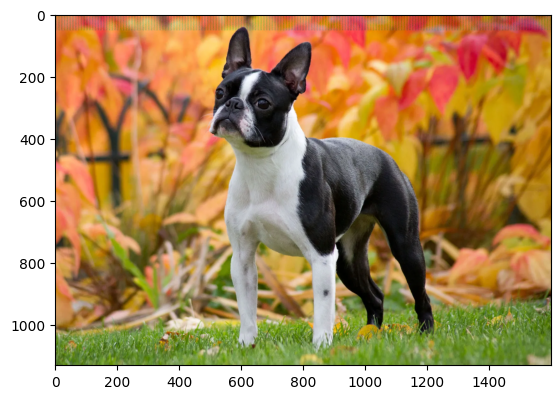

In [ ]:
plt.imshow(mpimg.imread('long_image1.png'));

In [ ]:
#edit the spacing parameter to hide the visual pattern
steg_write('dog_picture.png', message=long_text1, output_path='long_image2.png',spacing=1)

Message Length: 33,878
Image Saved!


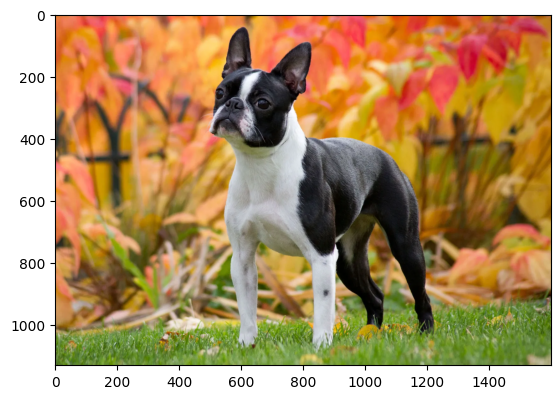

In [ ]:
plt.imshow(mpimg.imread('long_image2.png'));

In [ ]:
steg_read(image_path='long_image2.png', spacing=1, message_length=33881)

'I WAS sick -- sick unto death with that long algony; and when they at length unbound me, and I was permitted to sit, I felt that my senses were leaving me. The sentence -- the dread sentence of death -- was the last of distinct accentuation which reached my ears. After that, the sound of the inquisitorial voices seemed merged in one dreamy indeterminate hum. It conveyed to my soul the idea of revolution -- perhaps from its association in fancy with the burr of a mill wheel. This only for a brief period; for presently I heard no more. Yet, for a while, I saw; but with how terrible an exaggeration! I saw the lips of the black-robed judges. They appeared to me white -- whiter than the sheet upon which I trace these words -- and thin even to grotesqueness; thin with the intensity of their expression of firmness -- of immoveable resolution -- of stern contempt of human torture. I saw that the decrees of what to me was Fate, were still issuing from those lips. I saw them writhe with a deadl

### **Message too Large for Image**

**The text below is from one of the longest books written; [The History Of The Decline And Fall Of The Roman Empire](https://gutenberg.org/files/25717/25717-h/25717-h.htm) by Edward Gibbon. Reading the text file into a Python string, the length of the string is over 9 million characters, while our image is only around 7 million pixels. We will not be able to embed the text because the text is far larger than the image we are trying to embed it into.**

**To resolve the issue, a picture comprised of a larger amount of pixels can be used or multiple pictures can be used to embed the message.**

In [ ]:
with open('decline_and_fall.txt', 'r', encoding='iso-8859-1') as text:
    long_text2 = text.read()

print(f'The length of the text is {len(long_text2):,} characters')

The length of the text is 9,573,607 characters


In [ ]:
img = Image.open('dog_picture.png')
pixel_array = np.array(img)
pixel_length = len(pixel_array.flatten())

print(f'The total number of pixels in our image is: {pixel_length:,}')

The total number of pixels in our image is: 7,238,400


In [ ]:
steg_write('dog_picture.png', message=long_text2, output_path='long_image2.png',spacing=1)

ValueError: The message length and spacing is larger than the number of pixels in the image

### **Message Overwrites Original Image**

**Even if the number of characters in our message is not larger than the number of pixels, if there are enough characters this can change the original image enough where it is clear that there has been an edit. In the code block below, we will take the text from `decline_and_fall.txt` and cut it down to the total number of pixels in the image. We have to set the `spacing` parameter equal to `1`, otherwise there will not be enough pixels to swap with our message.**

**As in the previous example to resolve this issue a picture comprised of a larger amount of pixels can be used or multiple pictures can be used to embed the message.**

In [ ]:
long_text3 = long_text2[:pixel_length]
steg_write('dog_picture.png', message=long_text3, output_path='long_image3.png',spacing=1)

Message Length: 7,238,400
Image Saved!


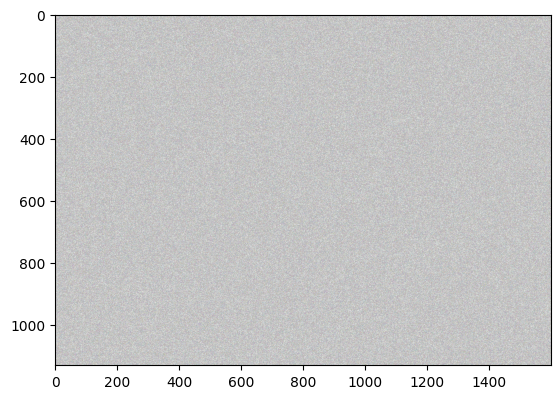

In [ ]:
plt.imshow(mpimg.imread('long_image3.png'));

# **References and Additional Learning**

## **Academic Presentation**

- **[Steganography](https://www.jsums.edu/nmeghanathan/files/2015/05/CSC439-Sp2013-10-Steganography.pdf) by Dr. Natarajan Meghanathan from Jackson State University's website**

## **Articles**

- **[JPEG vs PNG](https://www.adobe.com/creativecloud/file-types/image/comparison/jpeg-vs-png.html) from Adobe.com**

- **[Steganography](https://en.wikipedia.org/wiki/Steganography) from Wikipedia.org**

## **Data (Books)**

- **[The History Of The Decline And Fall Of The Roman Empire](https://gutenberg.org/files/25717/25717-h/25717-h.htm) by Edward Gibbon from Project Gutenberg**

- **[The Pit and the Pendulum](https://poestories.com/read/pit) by Edgar Allen Poe from PoeStories.com**

## **Video**

- **[Lemon Juice Invisible Ink (Chemistry)](https://www.youtube.com/watch?v=poCnU_crpjQ&ab_channel=BeardedScienceGuy) on YouTube by the BeardedScienceGuy**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [X](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717), [Medium](https://adriandolinay.medium.com/) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**